In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ny = pd.read_csv('./new_york.csv')
ny

,phase,indicator,group,state,subgroup,time_period,time_period_label,value,lowci,highci,confidence_interval,quartile_range,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,1,Symptoms of Depressive Disorder,By State,New York,New York,1,Apr 23 - May 5,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,2144.000897,794.878077,301.899744,0.00000,0.00000,0.000000
1,1,Symptoms of Anxiety Disorder,By State,New York,New York,1,Apr 23 - May 5,36.1,32.1,40.2,32.1 - 40.2,31.7 - 37.0,18 - 29 years,2144.000897,794.878077,301.899744,0.00000,0.00000,0.000000
2,1,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,1,Apr 23 - May 5,41.4,36.7,46.1,36.7 - 46.1,36.8 - 41.4,18 - 29 years,2144.000897,794.878077,301.899744,0.00000,0.00000,0.000000
3,1,Symptoms of Depressive Disorder,By State,New York,New York,2,May 7 - May 12,29.2,24.2,34.6,24.2 - 34.6,25.7 - 35.5,18 - 29 years,2404.179762,884.877857,360.036905,0.00000,0.00000,0.000000
4,1,Symptoms of Anxiety Disorder,By State,New York,New York,2,May 7 - May 12,33.0,27.7,38.5,27.7 - 38.5,31.6 - 38.3,18 - 29 years,2404.179762,884.877857,360.036905,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2,Symptoms of Anxiety Disorder,By State,New York,New York,13,Aug 19 - Aug 31,29.9,26.9,33.1,26.9 - 33.1,28.5-30.6,80 years and above,3044.419405,1090.545833,471.903691,76154.57143,18984.04762,6341.595238
290,2,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,13,Aug 19 - Aug 31,34.4,31.3,37.6,31.3 - 37.6,33.3-35.6,80 years and above,3044.419405,1090.545833,471.903691,76154.57143,18984.04762,6341.595238
291,2,Symptoms of Depressive Disorder,By State,New York,New York,14,Sep 2 - Sep 14,25.1,21.6,28.8,21.6 - 28.8,23.3-26.5,80 years and above,3079.854028,1096.361389,473.505972,77246.61111,19094.97222,6363.361111
292,2,Symptoms of Anxiety Disorder,By State,New York,New York,14,Sep 2 - Sep 14,33.5,29.7,37.5,29.7 - 37.5,33.5-36.9,80 years and above,3079.854028,1096.361389,473.505972,77246.61111,19094.97222,6363.361111


In [2]:
ny["indicator"].replace({"Symptoms of Anxiety Disorder": "1", "Symptoms of Depressive Disorder": "2", "Symptoms of Anxiety Disorder or Depressive Disorder": "3"}, inplace=True)
ny["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)


In [3]:
ny.head()

,phase,indicator,group,state,subgroup,time_period,time_period_label,value,lowci,highci,confidence_interval,quartile_range,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,1,2,By State,New York,New York,1,Apr 23 - May 5,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,29,2144.000897,794.878077,301.899744,0.0,0.0,0.0
1,1,1,By State,New York,New York,1,Apr 23 - May 5,36.1,32.1,40.2,32.1 - 40.2,31.7 - 37.0,29,2144.000897,794.878077,301.899744,0.0,0.0,0.0
2,1,3,By State,New York,New York,1,Apr 23 - May 5,41.4,36.7,46.1,36.7 - 46.1,36.8 - 41.4,29,2144.000897,794.878077,301.899744,0.0,0.0,0.0
3,1,2,By State,New York,New York,2,May 7 - May 12,29.2,24.2,34.6,24.2 - 34.6,25.7 - 35.5,29,2404.179762,884.877857,360.036905,0.0,0.0,0.0
4,1,1,By State,New York,New York,2,May 7 - May 12,33.0,27.7,38.5,27.7 - 38.5,31.6 - 38.3,29,2404.179762,884.877857,360.036905,0.0,0.0,0.0


In [4]:
data_to_use = ny
del data_to_use['group']
del data_to_use['state']
del data_to_use['subgroup']
del data_to_use['time_period_label']
del data_to_use['confidence_interval']
del data_to_use['quartile_range']

ny = data_to_use
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phase               294 non-null    int64  
 1   indicator           294 non-null    object 
 2   time_period         294 non-null    int64  
 3   value               294 non-null    float64
 4   lowci               294 non-null    float64
 5   highci              294 non-null    float64
 6   age                 294 non-null    object 
 7   CASE_RATE           294 non-null    float64
 8   HOSPITALIZED_RATE   294 non-null    float64
 9   DEATH_RATE          294 non-null    float64
 10  CASE_COUNT          294 non-null    float64
 11  HOSPITALIZED_COUNT  294 non-null    float64
 12  DEATH_COUNT         294 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 30.0+ KB


In [6]:
from sklearn import preprocessing

ny["age"] = ny['age'].astype(float)
ny["phase"] = ny['phase'].astype(float)
ny["indicator"] = ny['indicator'].astype(float)
ny["time_period"] = ny['time_period'].astype(float)

def min_max_normalization(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

ny = min_max_normalization(ny)
ny

,phase,indicator,time_period,value,lowci,highci,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,0.0,0.5,0.000000,0.328042,0.292398,0.366667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.0,0.0,0.000000,0.719577,0.730994,0.704762,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.0,1.0,0.000000,1.000000,1.000000,0.985714,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.0,0.5,0.076923,0.354497,0.269006,0.438095,0.0,0.278012,0.298523,0.338782,0.000000,0.000000,0.00000
4,0.0,0.0,0.076923,0.555556,0.473684,0.623810,0.0,0.278012,0.298523,0.338782,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1.0,0.0,0.923077,0.391534,0.426901,0.366667,1.0,0.962137,0.980710,0.990663,0.985863,0.994191,0.99658
290,1.0,1.0,0.923077,0.629630,0.684211,0.580952,1.0,0.962137,0.980710,0.990663,0.985863,0.994191,0.99658
291,1.0,0.5,1.000000,0.137566,0.116959,0.161905,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
292,1.0,0.0,1.000000,0.582011,0.590643,0.576190,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [151]:
values = ny.values

Y = values[:,1]
X = values[:,0:13]

X

array([[1.0, '2', 1.0, ..., 0.0, 0.0, 0.0],
       [1.0, '1', 1.0, ..., 0.0, 0.0, 0.0],
       [1.0, '3', 1.0, ..., 0.0, 0.0, 0.0],
       ...,
       [2.0, '2', 14.0, ..., 77246.61111, 19094.97222, 6363.361111],
       [2.0, '1', 14.0, ..., 77246.61111, 19094.97222, 6363.361111],
       [2.0, '3', 14.0, ..., 77246.61111, 19094.97222, 6363.361111]],
      dtype=object)

In [152]:
random_seed = 12

In [153]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB())]

In [154]:
import warnings
warnings.filterwarnings("ignore")
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model, X, Y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

LogReg| Mean=0.741494 STD=0.037677
SVM| Mean=0.492874 STD=0.228953
DecTree| Mean=1.000000 STD=0.000000
KNN| Mean=0.708046 STD=0.211154
LinDisc| Mean=0.949080 STD=0.027462
GaussianNB| Mean=0.921954 STD=0.014388


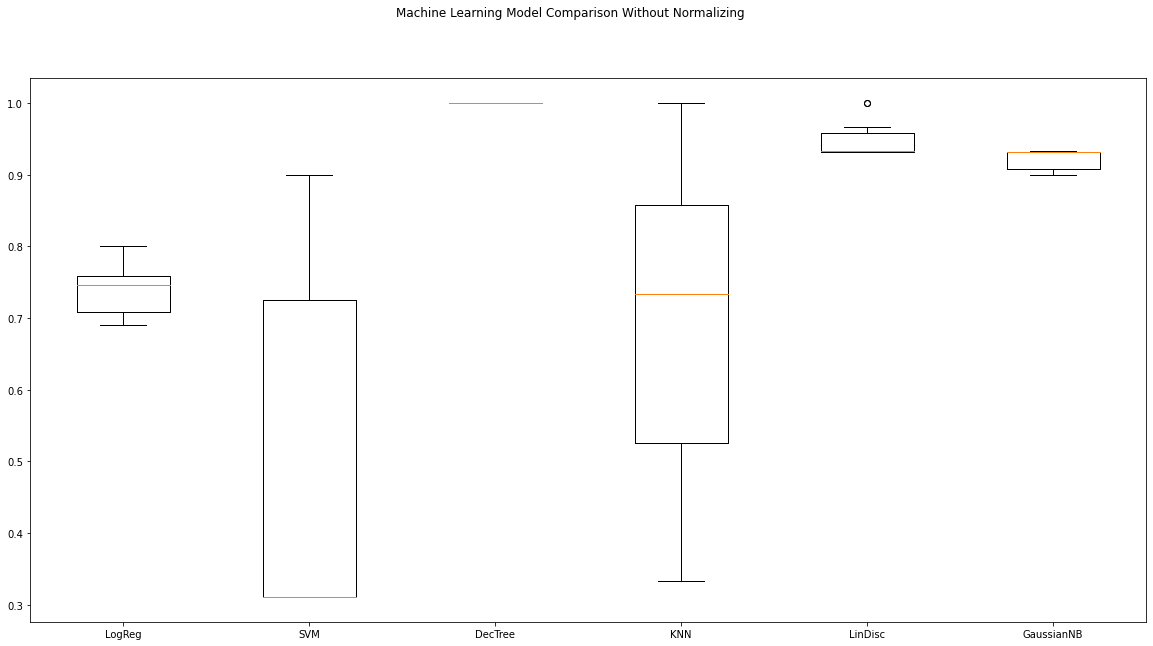

In [155]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison Without Normalizing')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

In [156]:
type(ny)

pandas.core.frame.DataFrame

In [157]:
values = ny.values

Y = values[:,1]

#Play with the amount of columnns 
X = values[:,2:13]
#X = values[:,3:13]
"""
Which features contribute the most? 
Try different features in subsets of 4 or more
See which subset results in big change in Mean 

Part 2:
Justify data NYS data/awareness --> contributes to symptoms 
Twitter trends/keywords during the same time period 

Build neural network ==> 
"""

Y

array(['2', '1', '3', '2', '1', '3', '2', '1', '3', '2', '1', '3', '2',
       '1', '3', '2', '1', '3', '2', '1', '3', '2', '1', '3', '2', '1',
       '3', '2', '1', '3', '2', '1', '3', '2', '1', '3', '2', '1', '3',
       '2', '1', '3', '2', '1', '3', '2', '1', '3', '2', '1', '3', '2',
       '1', '3', '2', '1', '3', '2', '1', '3', '2', '1', '3', '2', '1',
       '3', '2', '1', '3', '2', '1', '3', '2', '1', '3', '2', '1', '3',
       '2', '1', '3', '2', '1', '3', '2', '1', '3', '2', '1', '3', '2',
       '1', '3', '2', '1', '3', '2', '1', '3', '2', '1', '3', '2', '1',
       '3', '2', '1', '3', '2', '1', '3', '2', '1', '3', '2', '1', '3',
       '2', '1', '3', '2', '1', '3', '2', '1', '3', '2', '1', '3', '2',
       '1', '3', '2', '1', '3', '2', '1', '3', '2', '1', '3', '2', '1',
       '3', '2', '1', '3', '2', '1', '3', '2', '1', '3', '2', '1', '3',
       '2', '1', '3', '2', '1', '3', '2', '1', '3', '2', '1', '3', '2',
       '1', '3', '2', '1', '3', '2', '1', '3', '2', '1', '3', '2

In [158]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize

ny["indicator"] = ny['indicator'].astype(float)
ny = (ny-ny.min())/(ny.max()-ny.min())
ny

,phase,indicator,time_period,value,lowci,highci,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,0.0,0.5,0.000000,0.328042,0.292398,0.366667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.0,0.0,0.000000,0.719577,0.730994,0.704762,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.0,1.0,0.000000,1.000000,1.000000,0.985714,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.0,0.5,0.076923,0.354497,0.269006,0.438095,0.0,0.278012,0.298523,0.338782,0.000000,0.000000,0.00000
4,0.0,0.0,0.076923,0.555556,0.473684,0.623810,0.0,0.278012,0.298523,0.338782,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1.0,0.0,0.923077,0.391534,0.426901,0.366667,1.0,0.962137,0.980710,0.990663,0.985863,0.994191,0.99658
290,1.0,1.0,0.923077,0.629630,0.684211,0.580952,1.0,0.962137,0.980710,0.990663,0.985863,0.994191,0.99658
291,1.0,0.5,1.000000,0.137566,0.116959,0.161905,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
292,1.0,0.0,1.000000,0.582011,0.590643,0.576190,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [159]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          #('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB())]

In [160]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=20, random_state=random_seed)
    results = model_selection.cross_val_score(model, X, Y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

LogReg| Mean=0.726667 STD=0.118488
SVM| Mean=0.609048 STD=0.225082
KNN| Mean=0.703810 STD=0.255238
LinDisc| Mean=0.952381 STD=0.061427
GaussianNB| Mean=0.717619 STD=0.064928


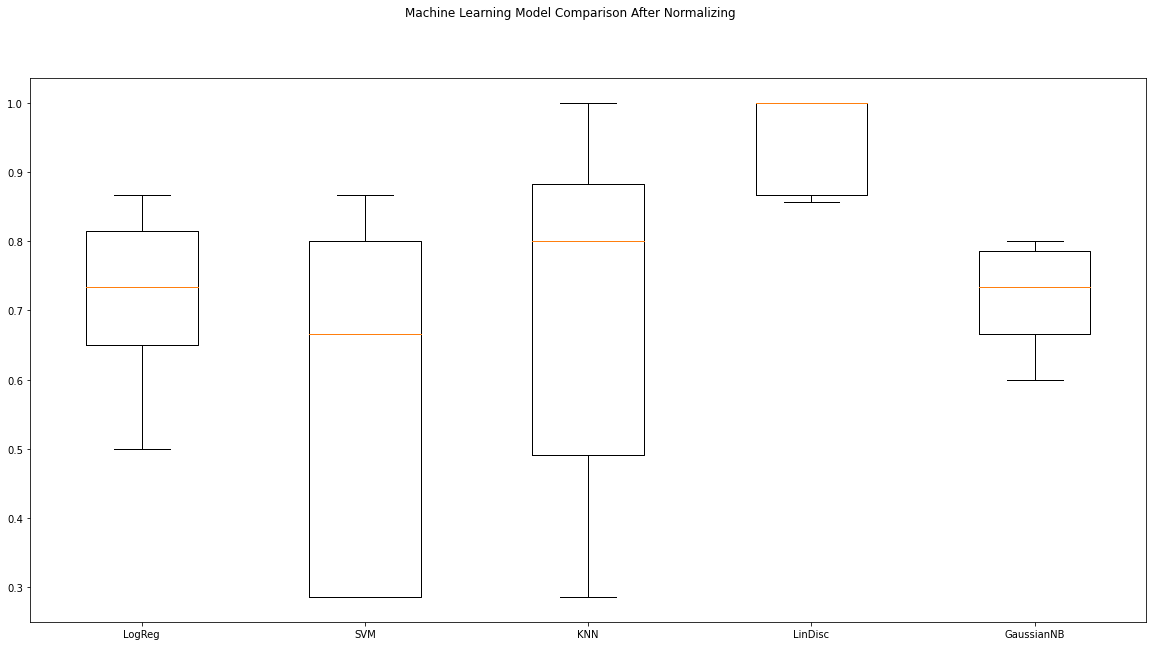

In [161]:
"""LogReg| Mean=0.741494 STD=0.037677
SVM| Mean=0.492874 STD=0.228953
DecTree| Mean=1.000000 STD=0.000000
KNN| Mean=0.708046 STD=0.211154
LinDisc| Mean=0.949080 STD=0.027462
GaussianNB| Mean=0.921954 STD=0.014388"""

fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison After Normalizing')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()